Session 2
===

Today, we'll continue working with the library `pandas`, which contains a large collection of high-performance data types for analyzing large data sets. For now, we'll do some examination of our 2017 weather data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Missing values and special values

`pandas` gives us tools for explicitly manipulating special values +/- infinity and "not-a-number" (`NaN`)

In [2]:
my_numbers = pd.Series([0, 1, 2, 3, 0, 9, 14])
my_numbers

0     0
1     1
2     2
3     3
4     0
5     9
6    14
dtype: int64

In [4]:
my_reciprocals = 1 / my_numbers
my_reciprocals

0         inf
1    1.000000
2    0.500000
3    0.333333
4         inf
5    0.111111
6    0.071429
dtype: float64

In [5]:
0 * my_reciprocals

0    NaN
1    0.0
2    0.0
3    0.0
4    NaN
5    0.0
6    0.0
dtype: float64

In [6]:
my_numbers / my_numbers

0    NaN
1    1.0
2    1.0
3    1.0
4    NaN
5    1.0
6    1.0
dtype: float64

`NaN` is a special value that `pandas` interprets as a missing value. The functions `pd.isna` (or `pd.isnull`) and `pd.notna` (or `pd.notnull`) may be utilized to find missing values for processing our data sets. We'll use this more next week.

In [13]:
# Masking with `isna`

(0 * my_reciprocals).notna()

0    False
1     True
2     True
3     True
4    False
5     True
6     True
dtype: bool

In [12]:
has_a_missing_value = my_numbers / my_numbers
has_a_missing_value

0    NaN
1    1.0
2    1.0
3    1.0
4    NaN
5    1.0
6    1.0
dtype: float64

In [15]:
class A:
    def __init__(self, a) -> None:
        self.a = a
        
    def multiply_by(self, value):
        return self.a * value
my_a= A(14)
my_a.multiply_by(8)

112

In [16]:
pd.notna(has_a_missing_value)

0    False
1     True
2     True
3     True
4    False
5     True
6     True
dtype: bool

In [17]:
has_a_missing_value[pd.isna(has_a_missing_value)] = 999
has_a_missing_value

0    999.0
1      1.0
2      1.0
3      1.0
4    999.0
5      1.0
6      1.0
dtype: float64

In [18]:
# Here's a list with a `None` in it - what happens to the None when we make it into a Series?

none_isnt_na = [1, 2, 3, None, 5]
none_isnt_na

[1, 2, 3, None, 5]

In [19]:
pd.Series(none_isnt_na)

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

#### Converting string data to numeric data with `pandas`

In [20]:
pd.to_numeric("4.5")

4.5

In [21]:
pd.to_numeric(pd.Series(["1.0", "3.0", "9.0"]))

0    1.0
1    3.0
2    9.0
dtype: float64

In [22]:
pd.to_numeric("abc")

ValueError: Unable to parse string "abc" at position 0

In [23]:
# We can force a missing value when the conversion fails using `errors=coerce`

pd.to_numeric("abc", errors="coerce")

nan

#### Converting string data to `datetime` data with `pandas`

`pandas` makes it easy, assuming that the library can figure out what you mean

In [24]:
pd.to_datetime("2/16/2022")

Timestamp('2022-02-16 00:00:00')

In [25]:
pd.to_datetime("February 16, 2022")

Timestamp('2022-02-16 00:00:00')

In [26]:
pd.to_datetime("20 February 2019 at 3pm")

Timestamp('2019-02-20 15:00:00')

In [ ]:
pd.to_datetime("4/6/22")

In [ ]:
pd.to_datetime("4/6/22", format="%d/%m/%y")

### Format a datetime

In [27]:
date = pd.to_datetime("4/6/22", format="%d/%m/%y")

In [28]:
date.strftime("%B")

'June'

#### Converting string data to `timedelta` data with `pandas`

`pandas` makes it easy, assuming that the library can figure out what you mean. Suffixes `y` (year), `w` (week), `d` (day), `h` (hour), `m` (minute), `s` (second) are supported.

In [29]:
my_date = pd.to_datetime("4/6/22", format="%d/%m/%y")
pd.to_timedelta("10d")

Timedelta('10 days 00:00:00')

In [30]:
my_date - pd.to_timedelta("10d")

Timestamp('2022-05-25 00:00:00')

In [33]:
pd.to_timedelta("3d12h10.5m")

Timedelta('3 days 12:10:30')

#### Writing a function and letting `pandas` use it to do calculations with a `pd.Series` object.

The `apply` method of a `pandas.Series` object executes your function on all the elements of a `Series` object. This often turns out to be a great place to utilize the `lambda` notation to make an anonymous function.

In [35]:
s = pd.Series([1,2,3,4])

s.apply(lambda z: f"The value is {z}")

0    The value is 1
1    The value is 2
2    The value is 3
3    The value is 4
dtype: object

#### Utilizing `apply` with a dataframe

When we use `apply` on a `pd.DataFrame`, it's expected that our function receives either columns or rows of data, as tuples. We use the "axis" optional argument to determine whether to apply over columns (`axis=0`) or rows(`axis=1`)

In [36]:
df = pd.DataFrame({"a": [1,2,3,4], "b":[5,6,7,8]})
df

,a,b
0,1,5
1,2,6
2,3,7
3,4,8


In [37]:
# A scalar function applied to a DataFrame is executed on all entries

df.apply(np.sqrt)

,a,b
0,1.000000,2.236068
1,1.414214,2.449490
2,1.732051,2.645751
3,2.000000,2.828427


In [ ]:
df['sqrt_a'] = df['a'].apply(np.sqrt)
df

In [38]:
# Use an anonymous function
df['b'].apply(lambda z: z * 10 + 5)

0    55
1    65
2    75
3    85
Name: b, dtype: int64

In [39]:
df['b'] * 10 + 5

0    55
1    65
2    75
3    85
Name: b, dtype: int64

In [ ]:
df['sqrt']

##### We can also use `apply` to manipulate data in rows or columns

In [40]:
df

,a,b
0,1,5
1,2,6
2,3,7
3,4,8


In [42]:
# Default is columns -- `axis=0`

df.apply(lambda z: z[0] + z[1], axis=1)


0     6
1     8
2    10
3    12
dtype: int64

In [44]:
# Process over columns, explicitly

df.apply(lambda z: z[0] + z[1], axis=0)

a     3
b    11
dtype: int64

In [43]:
# Process over rows, adding the columns

df.apply(lambda z: z[0] + z[1], axis=1)

0     6
1     8
2    10
3    12
dtype: int64

### The `str` accessor allows us to manipulate text data

In [45]:
text_series = pd.Series(["cow", "goat", "camel", "rhinoceros"])
text_series

0           cow
1          goat
2         camel
3    rhinoceros
dtype: object

In [46]:
# I can use a text expression, just as I'd like!

"animal: " + text_series

0           animal: cow
1          animal: goat
2         animal: camel
3    animal: rhinoceros
dtype: object

In [47]:
# But what happens when I want to find the length of the strings?

text_series.apply(len)

0     3
1     4
2     5
3    10
dtype: int64

In [48]:
# I can use `apply` to do arbitrarystring manipulations

text_series.apply(lambda z: z[0])


0    c
1    g
2    c
3    r
dtype: object

In [49]:
# I can also utilize the `str` accessor object on the Series to avoid the lambda!
# We'll see the `datetime` accessor `.dt` in some later steps.

text_series.str.split("c")

0           [, ow]
1           [goat]
2         [, amel]
3    [rhino, eros]
dtype: object

### Why is `apply` better than using looping? Is it even possible to loop over a data frame?

In [50]:
for i in range(len(df)):
    print(df.iloc[i,:])

a    1
b    5
Name: 0, dtype: int64
a    2
b    6
Name: 1, dtype: int64
a    3
b    7
Name: 2, dtype: int64
a    4
b    8
Name: 3, dtype: int64


## Using `pandas` to read our 2017 weather CSV file and manipulate it...


In [51]:
# We can read a CSV file with `pandas`

# Note the column names and row indices...

df17 = pd.read_csv('data/2017-weather.csv')
df17

,Date,HighT,AvgT,LowT,HighDP,AvgDP,LowDP,HighHum,AvgHum,LowHum,...,AvgPress,LowPress,HighVis,AvgVis,LowVia,HighWind,AvgWind,DirWind,Precip,Notes
0,1/1/17,46,35,24,38,29,20,89,77,58,...,30.07,29.98,10,9,4,9,4,-,0,NaN
1,1/2/17,54,48,41,52,46,38,97,91,77,...,29.97,29.83,10,3,0,10,5,-,0.33,"Fog , Rain"
2,1/3/17,54,45,34,54,48,31,100,92,86,...,29.74,29.67,10,3,0,17,4,26,0.36,"Fog , Rain"
3,1/4/17,30,24,19,28,14,10,89,68,57,...,30.07,29.93,10,10,7,15,11,24,0,NaN
4,1/5/17,19,14,8,14,10,2,84,76,60,...,30.05,29.99,10,4,0,9,5,-,0.03,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,13,6,-2,-5,-7,-9,79,63,46,...,30.73,30.66,10,10,10,14,6,16,0,NaN
361,12/28/17,21,13,4,7,1,-5,69,55,41,...,30.57,30.41,10,10,10,13,5,16,0,NaN
362,12/29/17,22,20,17,16,12,7,84,70,56,...,30.33,30.20,10,8,0,12,4,17,0.02,Snow
363,12/30/17,21,12,3,17,7,-6,91,69,46,...,30.28,30.15,10,8,2,15,7,20,T,Snow


In [52]:
# If I want to know the values of the index, I can use the `index` attribute

df17.index

RangeIndex(start=0, stop=365, step=1)

In [53]:
# If I want to know the column names, I can use the `columns` attribute...

df17.columns

Index(['Date', 'HighT', 'AvgT', 'LowT', 'HighDP', 'AvgDP', 'LowDP', 'HighHum',
       'AvgHum', 'LowHum', 'HighPress', 'AvgPress', 'LowPress', 'HighVis',
       'AvgVis', 'LowVia', 'HighWind', 'AvgWind', 'DirWind', 'Precip',
       'Notes'],
      dtype='object')

In [54]:
# We can summarize the data in a DataFrame using the 'describe' method

df17.describe()

,HighT,AvgT,LowT,HighDP,AvgDP,LowDP,HighHum,AvgHum,LowHum,HighPress,AvgPress,LowPress,HighVis,AvgVis,LowVia,HighWind,AvgWind
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,66.172603,56.019178,45.394521,49.778082,44.372603,38.482192,86.241096,67.068493,47.254795,30.120658,30.027205,29.934849,9.975342,8.871233,6.035616,16.684932,6.830137
std,18.711233,17.272609,16.612188,16.979709,17.492175,18.220048,9.927039,10.789862,15.035426,0.195326,0.201753,0.211060,0.309102,1.779730,4.020052,5.075465,3.176782
min,12.000000,6.000000,-4.000000,-5.000000,-7.000000,-10.000000,0.000000,0.000000,0.000000,29.590000,29.460000,29.230000,5.000000,2.000000,0.000000,7.000000,1.000000
25%,53.000000,43.000000,33.000000,38.000000,32.000000,25.000000,83.000000,61.000000,36.000000,30.000000,29.910000,29.810000,10.000000,8.000000,2.000000,13.000000,4.000000
50%,69.000000,60.000000,48.000000,54.000000,48.000000,41.000000,89.000000,67.000000,46.000000,30.100000,30.020000,29.940000,10.000000,10.000000,8.000000,16.000000,7.000000
75%,82.000000,71.000000,59.000000,63.000000,59.000000,54.000000,93.000000,74.000000,57.000000,30.220000,30.120000,30.050000,10.000000,10.000000,10.000000,20.000000,9.000000
max,94.000000,86.000000,77.000000,77.000000,74.000000,71.000000,100.000000,93.000000,86.000000,30.800000,30.730000,30.660000,10.000000,10.000000,10.000000,35.000000,18.000000


In [55]:
# Find the average high temperature...

df17['HighT'].mean()

66.17260273972603

In [56]:
# Converting precipitation to numerics with 0.005" as the trace amount

df17 = pd.read_csv('data/2017-weather.csv')
df17.loc[df17["Precip"] == "T", "Precip"] = 0.005
df17

,Date,HighT,AvgT,LowT,HighDP,AvgDP,LowDP,HighHum,AvgHum,LowHum,...,AvgPress,LowPress,HighVis,AvgVis,LowVia,HighWind,AvgWind,DirWind,Precip,Notes
0,1/1/17,46,35,24,38,29,20,89,77,58,...,30.07,29.98,10,9,4,9,4,-,0,NaN
1,1/2/17,54,48,41,52,46,38,97,91,77,...,29.97,29.83,10,3,0,10,5,-,0.33,"Fog , Rain"
2,1/3/17,54,45,34,54,48,31,100,92,86,...,29.74,29.67,10,3,0,17,4,26,0.36,"Fog , Rain"
3,1/4/17,30,24,19,28,14,10,89,68,57,...,30.07,29.93,10,10,7,15,11,24,0,NaN
4,1/5/17,19,14,8,14,10,2,84,76,60,...,30.05,29.99,10,4,0,9,5,-,0.03,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,13,6,-2,-5,-7,-9,79,63,46,...,30.73,30.66,10,10,10,14,6,16,0,NaN
361,12/28/17,21,13,4,7,1,-5,69,55,41,...,30.57,30.41,10,10,10,13,5,16,0,NaN
362,12/29/17,22,20,17,16,12,7,84,70,56,...,30.33,30.20,10,8,0,12,4,17,0.02,Snow
363,12/30/17,21,12,3,17,7,-6,91,69,46,...,30.28,30.15,10,8,2,15,7,20,0.005,Snow


In [57]:
# Converting precipitation to numerics with NaN as the trace amount

df17 = pd.read_csv('data/2017-weather.csv')

df17['Precip'] = pd.to_numeric(df17['Precip'], errors='coerce')
df17.loc[pd.isna(df17['Precip']), 'Precip'] = 0.005

df17['Precip'].dtype
df17

,Date,HighT,AvgT,LowT,HighDP,AvgDP,LowDP,HighHum,AvgHum,LowHum,...,AvgPress,LowPress,HighVis,AvgVis,LowVia,HighWind,AvgWind,DirWind,Precip,Notes
0,1/1/17,46,35,24,38,29,20,89,77,58,...,30.07,29.98,10,9,4,9,4,-,0.000,NaN
1,1/2/17,54,48,41,52,46,38,97,91,77,...,29.97,29.83,10,3,0,10,5,-,0.330,"Fog , Rain"
2,1/3/17,54,45,34,54,48,31,100,92,86,...,29.74,29.67,10,3,0,17,4,26,0.360,"Fog , Rain"
3,1/4/17,30,24,19,28,14,10,89,68,57,...,30.07,29.93,10,10,7,15,11,24,0.000,NaN
4,1/5/17,19,14,8,14,10,2,84,76,60,...,30.05,29.99,10,4,0,9,5,-,0.030,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,13,6,-2,-5,-7,-9,79,63,46,...,30.73,30.66,10,10,10,14,6,16,0.000,NaN
361,12/28/17,21,13,4,7,1,-5,69,55,41,...,30.57,30.41,10,10,10,13,5,16,0.000,NaN
362,12/29/17,22,20,17,16,12,7,84,70,56,...,30.33,30.20,10,8,0,12,4,17,0.020,Snow
363,12/30/17,21,12,3,17,7,-6,91,69,46,...,30.28,30.15,10,8,2,15,7,20,0.005,Snow


<Axes: >

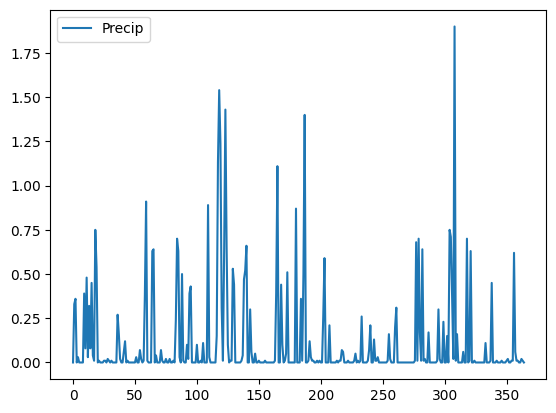

In [58]:
# Now -- convert the Date to a DateTime
# Note the plot above...

df17 = pd.read_csv('data/2017-weather.csv')

# Convert the date into a datetime
df17['Date'] = pd.to_datetime(df17['Date'])

# NOTE that we're only changing the Precip column of the masked rows!!
df17.loc[df17.Precip=='D', 'Precip'] = '0.0'
df17.loc[df17.Precip=='T', 'Precip'] = '0.01'
df17['Precip'] = pd.to_numeric(df17['Precip'])

df17.plot(y='Precip')

In [59]:
df17['Date'].dtype

dtype('<M8[ns]')

<Axes: >

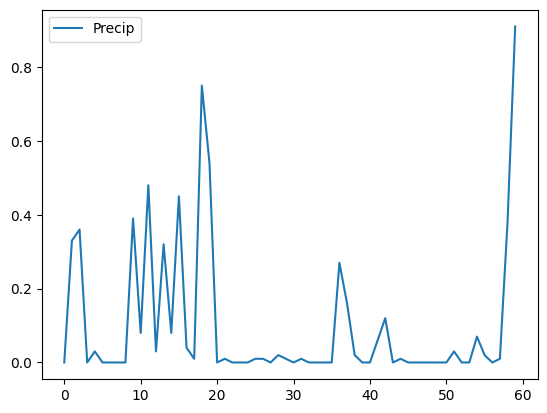

In [60]:
# Plot the first 60 days
df17.iloc[0:60].plot(y='Precip')

In [61]:
# We can make the table be indexed by the date

df17 = pd.read_csv('data/2017-weather.csv')

df17['Date'] = pd.to_datetime(df17['Date'])
df17.index = df17['Date']

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

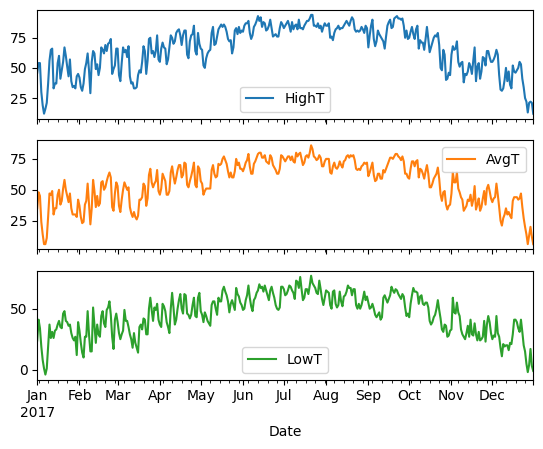

In [67]:
df17.loc[df17.Precip=='D', 'Precip'] = '0.005'
df17.loc[df17.Precip=='T', 'Precip'] = '0.005'
df17['Precip'] = pd.to_numeric(df17['Precip'])

df17.plot(y=['HighT','AvgT','LowT'], subplots=True)

In [63]:
df17

,Date,HighT,AvgT,LowT,HighDP,AvgDP,LowDP,HighHum,AvgHum,LowHum,...,AvgPress,LowPress,HighVis,AvgVis,LowVia,HighWind,AvgWind,DirWind,Precip,Notes
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2017-01-01,46,35,24,38,29,20,89,77,58,...,30.07,29.98,10,9,4,9,4,-,0.000,NaN
2017-01-02,2017-01-02,54,48,41,52,46,38,97,91,77,...,29.97,29.83,10,3,0,10,5,-,0.330,"Fog , Rain"
2017-01-03,2017-01-03,54,45,34,54,48,31,100,92,86,...,29.74,29.67,10,3,0,17,4,26,0.360,"Fog , Rain"
2017-01-04,2017-01-04,30,24,19,28,14,10,89,68,57,...,30.07,29.93,10,10,7,15,11,24,0.000,NaN
2017-01-05,2017-01-05,19,14,8,14,10,2,84,76,60,...,30.05,29.99,10,4,0,9,5,-,0.030,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,2017-12-27,13,6,-2,-5,-7,-9,79,63,46,...,30.73,30.66,10,10,10,14,6,16,0.000,NaN
2017-12-28,2017-12-28,21,13,4,7,1,-5,69,55,41,...,30.57,30.41,10,10,10,13,5,16,0.000,NaN
2017-12-29,2017-12-29,22,20,17,16,12,7,84,70,56,...,30.33,30.20,10,8,0,12,4,17,0.020,Snow


<Axes: xlabel='Date'>

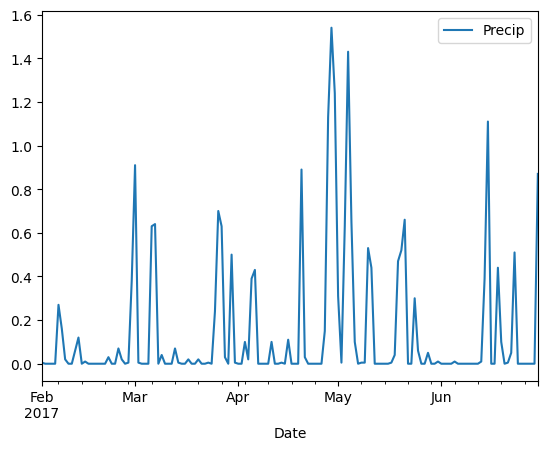

In [64]:
# Plot February precip
df17.loc['2017-02':"2017-06"].plot(y='Precip')

<Axes: xlabel='LowT'>

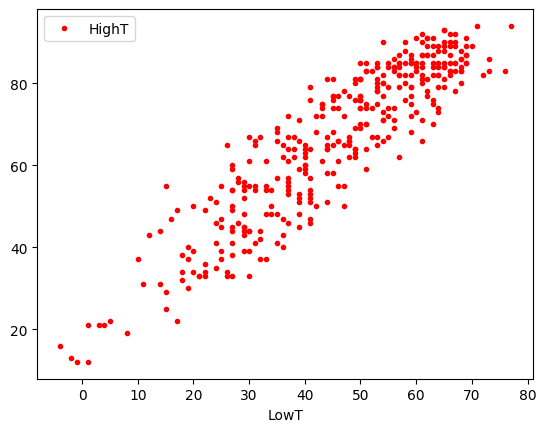

In [68]:
# Let's plot one variable versus another in a scatter plot

df17.plot(x='LowT', y='HighT', style='r.')

In [69]:
# We can get the correlation coefficient using the `corr` method...

df17['LowT'].corr(df17['HighT'])

0.9094724986648605

In [70]:
df17.loc['2017-02-02':'2017-02-09']

,Date,HighT,AvgT,LowT,HighDP,AvgDP,LowDP,HighHum,AvgHum,LowHum,...,AvgPress,LowPress,HighVis,AvgVis,LowVia,HighWind,AvgWind,DirWind,Precip,Notes
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-02,2017-02-02,34,28,22,23,11,3,71,50,29,...,30.37,30.26,10,10,10,14,5,16,0.00,NaN
2017-02-03,2017-02-03,31,23,14,13,8,3,67,49,31,...,30.47,30.38,10,10,10,12,5,17,0.00,NaN
2017-02-04,2017-02-04,37,24,10,12,7,5,83,55,27,...,30.35,30.05,10,10,8,16,6,23,0.00,NaN
2017-02-05,2017-02-05,49,38,27,28,24,9,78,54,29,...,30.07,30.01,10,10,7,21,9,30,0.00,NaN
2017-02-06,2017-02-06,54,41,27,51,40,23,100,83,65,...,29.92,29.72,10,4,0,16,7,19,0.27,"Fog , Rain , Thunderstorm"
2017-02-07,2017-02-07,62,55,48,56,52,40,93,80,67,...,29.58,29.45,10,9,4,24,14,35,0.16,"Rain , Thunderstorm"
2017-02-08,2017-02-08,48,39,29,39,29,23,89,80,70,...,29.84,29.69,10,7,0,21,11,27,0.02,"Fog , Snow"
2017-02-09,2017-02-09,29,22,15,22,11,6,78,62,46,...,30.29,30.04,10,10,10,16,7,24,0.00,NaN


<Axes: xlabel='Date'>

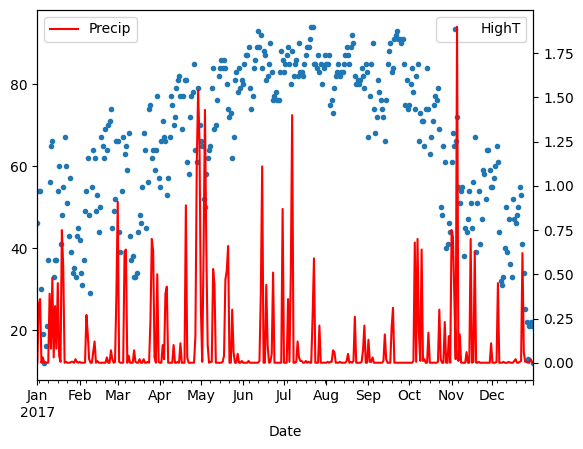

In [71]:
# Plots with two y axes...

fig, ax = plt.subplots()
ax2 = ax.twinx()
df17.plot(y='HighT', ax=ax, style=".")
df17.plot(y='Precip', ax=ax2, style='r-')

Grouping data by values in a column
---

We use the `groupby` method of the `DataFrame` to group values. Note: to access the `datetime` object that's stored in a column, we utilize the `dt` accessor...

In [72]:
# We can make the table be indexed by the date

df17 = pd.read_csv('data/2017-weather.csv')

# Convert the date and make it an index
df17['Date'] = pd.to_datetime(df17['Date'])
df17.index = df17['Date']# Create a new column that contains the month for each entry

# Convert the precip
df17.loc[df17.Precip=='D', 'Precip'] = '0.005'
df17.loc[df17.Precip=='T', 'Precip'] = '0.005'
df17['Precip'] = pd.to_numeric(df17['Precip'])

# Add a new column with the month abbreviation
df17['Month'] = df17['Date'].dt.strftime('%b')
df17

,Date,HighT,AvgT,LowT,HighDP,AvgDP,LowDP,HighHum,AvgHum,LowHum,...,LowPress,HighVis,AvgVis,LowVia,HighWind,AvgWind,DirWind,Precip,Notes,Month
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2017-01-01,46,35,24,38,29,20,89,77,58,...,29.98,10,9,4,9,4,-,0.000,NaN,Jan
2017-01-02,2017-01-02,54,48,41,52,46,38,97,91,77,...,29.83,10,3,0,10,5,-,0.330,"Fog , Rain",Jan
2017-01-03,2017-01-03,54,45,34,54,48,31,100,92,86,...,29.67,10,3,0,17,4,26,0.360,"Fog , Rain",Jan
2017-01-04,2017-01-04,30,24,19,28,14,10,89,68,57,...,29.93,10,10,7,15,11,24,0.000,NaN,Jan
2017-01-05,2017-01-05,19,14,8,14,10,2,84,76,60,...,29.99,10,4,0,9,5,-,0.030,Snow,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,2017-12-27,13,6,-2,-5,-7,-9,79,63,46,...,30.66,10,10,10,14,6,16,0.000,NaN,Dec
2017-12-28,2017-12-28,21,13,4,7,1,-5,69,55,41,...,30.41,10,10,10,13,5,16,0.000,NaN,Dec
2017-12-29,2017-12-29,22,20,17,16,12,7,84,70,56,...,30.20,10,8,0,12,4,17,0.020,Snow,Dec


In [73]:
# What was the average high temperature in each month?

monthly = pd.DataFrame({'Average': df17['HighT'].groupby(df17['Month']).mean(),
                        'Precip': df17['Precip'].groupby(df17['Month']).sum(),
                        })
monthly

,Average,Precip
Month,,
Apr,70.933333,6.135
Aug,83.193548,0.770
Dec,40.161290,1.225
Feb,54.178571,1.150
Jan,43.483871,3.925
Jul,85.774194,3.515
Jun,83.700000,3.495
Mar,54.870968,4.450
May,73.548387,6.220


### WAIT! What happened to the months? They're out of order!! 

Let's look at how `groupby` works. The groups are identified and then processed in order...

In [74]:
# How does `groupby` work? It creates an iterable sequence of tuples! 

for mon, data in df17.groupby('Month')["HighT"]:
    print(mon, data)

Apr Date
2017-04-01    55
2017-04-02    66
2017-04-03    71
2017-04-04    67
2017-04-05    66
2017-04-06    53
2017-04-07    57
2017-04-08    67
2017-04-09    77
2017-04-10    75
2017-04-11    70
2017-04-12    72
2017-04-13    79
2017-04-14    81
2017-04-15    82
2017-04-16    77
2017-04-17    69
2017-04-18    77
2017-04-19    81
2017-04-20    81
2017-04-21    61
2017-04-22    58
2017-04-23    72
2017-04-24    77
2017-04-25    78
2017-04-26    85
2017-04-27    64
2017-04-28    61
2017-04-29    79
2017-04-30    70
Name: HighT, dtype: int64
Aug Date
2017-08-01    85
2017-08-02    85
2017-08-03    87
2017-08-04    75
2017-08-05    76
2017-08-06    73
2017-08-07    79
2017-08-08    82
2017-08-09    83
2017-08-10    85
2017-08-11    82
2017-08-12    83
2017-08-13    83
2017-08-14    85
2017-08-15    87
2017-08-16    89
2017-08-17    87
2017-08-18    85
2017-08-19    89
2017-08-20    92
2017-08-21    90
2017-08-22    82
2017-08-23    80
2017-08-24    81
2017-08-25    80
2017-08-26    81
2017

In [75]:
# We can optionally turn off the sorting in a `groupby` clause...

for mon, data in df17.groupby('Month', sort=False)["HighT"]:
    print(mon, data)

Jan Date
2017-01-01    46
2017-01-02    54
2017-01-03    54
2017-01-04    30
2017-01-05    19
2017-01-06    12
2017-01-07    16
2017-01-08    21
2017-01-09    37
2017-01-10    56
2017-01-11    65
2017-01-12    66
2017-01-13    33
2017-01-14    37
2017-01-15    37
2017-01-16    54
2017-01-17    60
2017-01-18    41
2017-01-19    48
2017-01-20    55
2017-01-21    67
2017-01-22    60
2017-01-23    51
2017-01-24    43
2017-01-25    57
2017-01-26    39
2017-01-27    34
2017-01-28    35
2017-01-29    33
2017-01-30    43
2017-01-31    45
Name: HighT, dtype: int64
Feb Date
2017-02-01    42
2017-02-02    34
2017-02-03    31
2017-02-04    37
2017-02-05    49
2017-02-06    54
2017-02-07    62
2017-02-08    48
2017-02-09    29
2017-02-10    55
2017-02-11    64
2017-02-12    62
2017-02-13    49
2017-02-14    53
2017-02-15    44
2017-02-16    50
2017-02-17    67
2017-02-18    65
2017-02-19    62
2017-02-20    69
2017-02-21    64
2017-02-22    70
2017-02-23    71
2017-02-24    74
2017-02-25    45
2017

In [76]:
# What was the average high temperature in each month?

monthly = pd.DataFrame({'Average': df17['HighT'].groupby(df17['Month'], sort=False).mean(),
                        'Precip': df17['Precip'].groupby(df17['Month'], sort=False).sum(),
                        })
monthly

,Average,Precip
Month,,
Jan,43.483871,3.925
Feb,54.178571,1.150
Mar,54.870968,4.450
Apr,70.933333,6.135
May,73.548387,6.220
Jun,83.700000,3.495
Jul,85.774194,3.515
Aug,83.193548,0.770
Sep,81.333333,0.870


In [ ]:
# Now, make a plot with two y-axes

fig, ax = plt.subplots()
ax2 = ax.twinx()

monthly['Average'].plot(ax=ax)
monthly['Precip'].plot(ax=ax2, style='r')

# Available aggregation functions for groups
---

<pre>
Function	Description
count	    Number of non-null observations
sum	        Sum of values
mean	    Mean of values
mad	        Mean absolute deviation
median	    Arithmetic median of values
min	        Minimum
max	        Maximum
mode	    Mode
abs	        Absolute Value
prod	    Product of values
std	        Unbiased standard deviation
var	        Unbiased variance
sem	        Unbiased standard error of the mean
skew	    Unbiased skewness (3rd moment)
kurt	    Unbiased kurtosis (4th moment)
quantile	Sample quantile (value at %)
cumsum	    Cumulative sum
cumprod	    Cumulative product
cummax	    Cumulative maximum
cummin	    Cumulative minimum
</pre>


Let's explore the weather data!
---

In [ ]:
# Is there a correlation between temperaturee and windspeed
df17.plot(x='AvgT', y='AvgWind', style='.')

In [ ]:
# What were the five rainiest weeks?
# Grouping by week requires the use of the `isocalendar() function of the `datetime` accessor...

dfp = pd.DataFrame(df17['Precip'].groupby(df17['Date'].dt.isocalendar().week).sum().sort_values(ascending=False)[0:5])
dfp

In [ ]:
# High temperature for every month

df17['HighT'].groupby(df17['Month'], sort=False).max()
